In [1]:
import pandas as pd
import pickle
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300

In [2]:
datasets = [
    'CBF',
    'ItalyPowerDemand',
    'ECG200',
    'ECGFiveDays',
    'Plane',
    'ShapeletSim',
    'SonyAIBORobotSurface1',
    'SonyAIBORobotSurface2',
    'Trace',
    'TwoLeadECG'
]
uncertainty_levels = [
    '0_1',
    '0_8',
    '2_0'
]
similarity_measures = [
    'FOTS',
    'UED',
    'ED'
]

classes_dict = {
    'CBF': 3,
    'ItalyPowerDemand': 2,
    'ECG200': 2,
    'ECGFiveDays': 2,
    'Plane': 7,
    'ShapeletSim': 2,
    'SonyAIBORobotSurface1': 2,
    'SonyAIBORobotSurface2': 2,
    'Trace': 4,
    'TwoLeadECG': 2
}

## Fetch metrics from results file

In [3]:
results_paths = glob.glob(os.path.join('12_01', '*.dat'))
print('results_paths:', len(results_paths))

results_paths: 27


In [6]:
index = pd.MultiIndex.from_product([datasets, uncertainty_levels, similarity_measures],
                                   names=['dataset', 'uncertainty_level', 'similarity_measure'])
df_results = pd.DataFrame(index=index, columns=['RI', 'time', 'num_clusters', 'lenSubsequence', 'num_classes'])

for results_path in results_paths:
    filename = os.path.basename(results_path).split('.')[0].split('_', 2)
    dataset = filename[1]
    uncertainty_level = filename[2]
    print('dataset:', dataset)
    print('uncertainty_level:', uncertainty_level)
    
    with open(results_path, 'rb') as f:
        results = pickle.load(f)
        
        for similarity_measure in similarity_measures:
            print('similarity_measure:', similarity_measure)
            
            lenSubsequences = list(results[similarity_measure].keys())
            print('lenSubsequences:', lenSubsequences)

            bestLenSubsequence = lenSubsequences[0]
            bestRI = results[similarity_measure][bestLenSubsequence]['RI']
            for curLenSubsequence in lenSubsequences:
                curRI = results[similarity_measure][curLenSubsequence]['RI']
                print('lenSubsequence:', curLenSubsequence, '\tRI:', curRI)
                if curRI > bestRI:
                    bestRI = curRI
                    bestLenSubsequence = curLenSubsequence
            print('bestLenSubsequence:', bestLenSubsequence)
            print('bestRI:', bestRI)
            print()
            
            for lenSubsequence in results[similarity_measure].keys():
                df_results.loc[(dataset, uncertainty_level, similarity_measure), 'RI'] = float(results[similarity_measure][bestLenSubsequence]['RI'])
                df_results.loc[(dataset, uncertainty_level, similarity_measure), 'time'] = float(results[similarity_measure][bestLenSubsequence]['time'])
                df_results.loc[(dataset, uncertainty_level, similarity_measure), 'num_clusters'] = int(results[similarity_measure][bestLenSubsequence]['num_clusters'])
                df_results.loc[(dataset, uncertainty_level, similarity_measure), 'lenSubsequence'] = int(bestLenSubsequence)
                df_results.loc[(dataset, uncertainty_level, similarity_measure), 'num_classes'] = classes_dict[dataset]

dataset: CBF
uncertainty_level: 0_1
similarity_measure: FOTS
lenSubsequences: [6]
lenSubsequence: 6 	RI: 0.6343900829889927
bestLenSubsequence: 6
bestRI: 0.6343900829889927

similarity_measure: UED
lenSubsequences: [6, 39]
lenSubsequence: 6 	RI: 0.7436785999513872
lenSubsequence: 39 	RI: 0.4825260136347327
bestLenSubsequence: 6
bestRI: 0.7436785999513872

similarity_measure: ED
lenSubsequences: [39]
lenSubsequence: 39 	RI: 0.48480850029514916
bestLenSubsequence: 39
bestRI: 0.48480850029514916

dataset: CBF
uncertainty_level: 0_8
similarity_measure: FOTS
lenSubsequences: [6]
lenSubsequence: 6 	RI: 0.6349873259488177
bestLenSubsequence: 6
bestRI: 0.6349873259488177

similarity_measure: UED
lenSubsequences: [6, 39]
lenSubsequence: 6 	RI: 0.5413012025880528
lenSubsequence: 39 	RI: 0.47634524346910195
bestLenSubsequence: 6
bestRI: 0.5413012025880528

similarity_measure: ED
lenSubsequences: [39]
lenSubsequence: 39 	RI: 0.4794911860365522
bestLenSubsequence: 39
bestRI: 0.4794911860365522

dat

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2894: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


 ED
lenSubsequences: [7]
lenSubsequence: 7 	RI: 0.5071626170716261
bestLenSubsequence: 7
bestRI: 0.5071626170716261

dataset: ItalyPowerDemand
uncertainty_level: 2_0
similarity_measure: FOTS
lenSubsequences: [8]
lenSubsequence: 8 	RI: 0.500651601506516
bestLenSubsequence: 8
bestRI: 0.500651601506516

similarity_measure: UED
lenSubsequences: [7, 8]
lenSubsequence: 7 	RI: 0.5026797320267973
lenSubsequence: 8 	RI: 0.5013898610138986
bestLenSubsequence: 7
bestRI: 0.5026797320267973

similarity_measure: ED
lenSubsequences: [7]
lenSubsequence: 7 	RI: 0.5020581275205813
bestLenSubsequence: 7
bestRI: 0.5020581275205813

dataset: Plane
uncertainty_level: 0_1
similarity_measure: FOTS
lenSubsequences: [6]
lenSubsequence: 6 	RI: 0.7901572112098428
bestLenSubsequence: 6
bestRI: 0.7901572112098428

similarity_measure: UED
lenSubsequences: [6, 13]
lenSubsequence: 6 	RI: 0.39375712007290953
lenSubsequence: 13 	RI: 0.4101617680565049
bestLenSubsequence: 13
bestRI: 0.4101617680565049

similarity_measure

RI          time  \
dataset    uncertainty_level similarity_measure                           
CBF        0_1               FOTS                 0.63439  28735.848004   
                             UED                 0.743679   2392.680721   
                             ED                  0.484809    635.785654   
           0_8               FOTS                0.634987  30016.299195   
                             UED                 0.541301   2597.292168   
...                                                   ...           ...   
TwoLeadECG 0_8               UED                 0.504552   1352.874831   
                             ED                  0.500564    633.247686   
           2_0               FOTS                0.500972  25404.845917   
                             UED                 0.502227    2338.40621   
                             ED                  0.499761   1120.245655   

                                                num_clusters lenSubsequence  \
dataset    uncertainty_level similarity_measure                               
CBF        0_1               FOTS                         13              6   
                             UED                           4              6   
                             ED                            5             39   
           0_8               FOTS                         17              6   
                             UED                           3              6   
...                                                      ...            ...   
TwoLeadECG 0_8               UED                           6             15   
                             ED                            6             10   
           2_0               FOTS                         17             15   
                             UED                           4             10   
                             ED                            8             10   

                                                num_classes  
dataset    uncertainty_level similarity_measure              
CBF        0_1               FOTS                         3  
                             UED                          3  
                             ED                           3  
           0_8               FOTS                         3  
                             UED                          3  
...                                                     ...  
TwoLeadECG 0_8               UED                          2  
                             ED                           2  
           2_0               FOTS                         2  
                             UED                          2  
                             ED                           2  

[90 rows x 5 columns]

In [7]:
# Output to the console
df_results

RI          time  \
dataset    uncertainty_level similarity_measure                           
CBF        0_1               FOTS                 0.63439  28735.848004   
                             UED                 0.743679   2392.680721   
                             ED                  0.484809    635.785654   
           0_8               FOTS                0.634987  30016.299195   
                             UED                 0.541301   2597.292168   
...                                                   ...           ...   
TwoLeadECG 0_8               UED                 0.504552   1352.874831   
                             ED                  0.500564    633.247686   
           2_0               FOTS                0.500972  25404.845917   
                             UED                 0.502227    2338.40621   
                             ED                  0.499761   1120.245655   

                                                num_clusters lenSubsequence  \
dataset    uncertainty_level similarity_measure                               
CBF        0_1               FOTS                         13              6   
                             UED                           4              6   
                             ED                            5             39   
           0_8               FOTS                         17              6   
                             UED                           3              6   
...                                                      ...            ...   
TwoLeadECG 0_8               UED                           6             15   
                             ED                            6             10   
           2_0               FOTS                         17             15   
                             UED                           4             10   
                             ED                            8             10   

                                                num_classes  
dataset    uncertainty_level similarity_measure              
CBF        0_1               FOTS                         3  
                             UED                          3  
                             ED                           3  
           0_8               FOTS                         3  
                             UED                          3  
...                                                     ...  
TwoLeadECG 0_8               UED                          2  
                             ED                           2  
           2_0               FOTS                         2  
                             UED                          2  
                             ED                           2  

[90 rows x 5 columns]

## Export the big table to Excel

In [8]:
df_results.to_excel('results_table.xlsx')

## Generate barplots

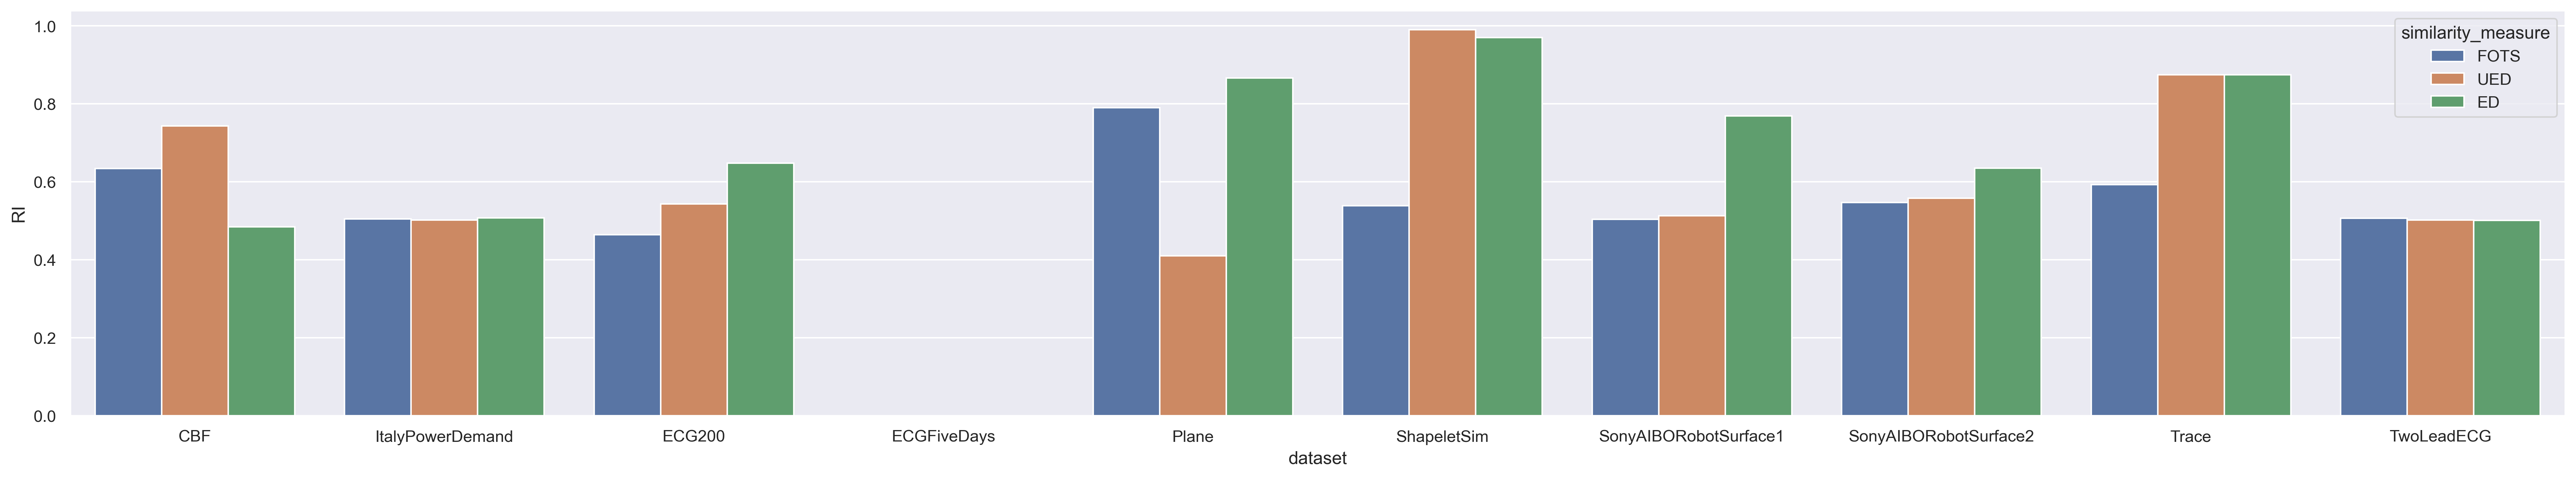

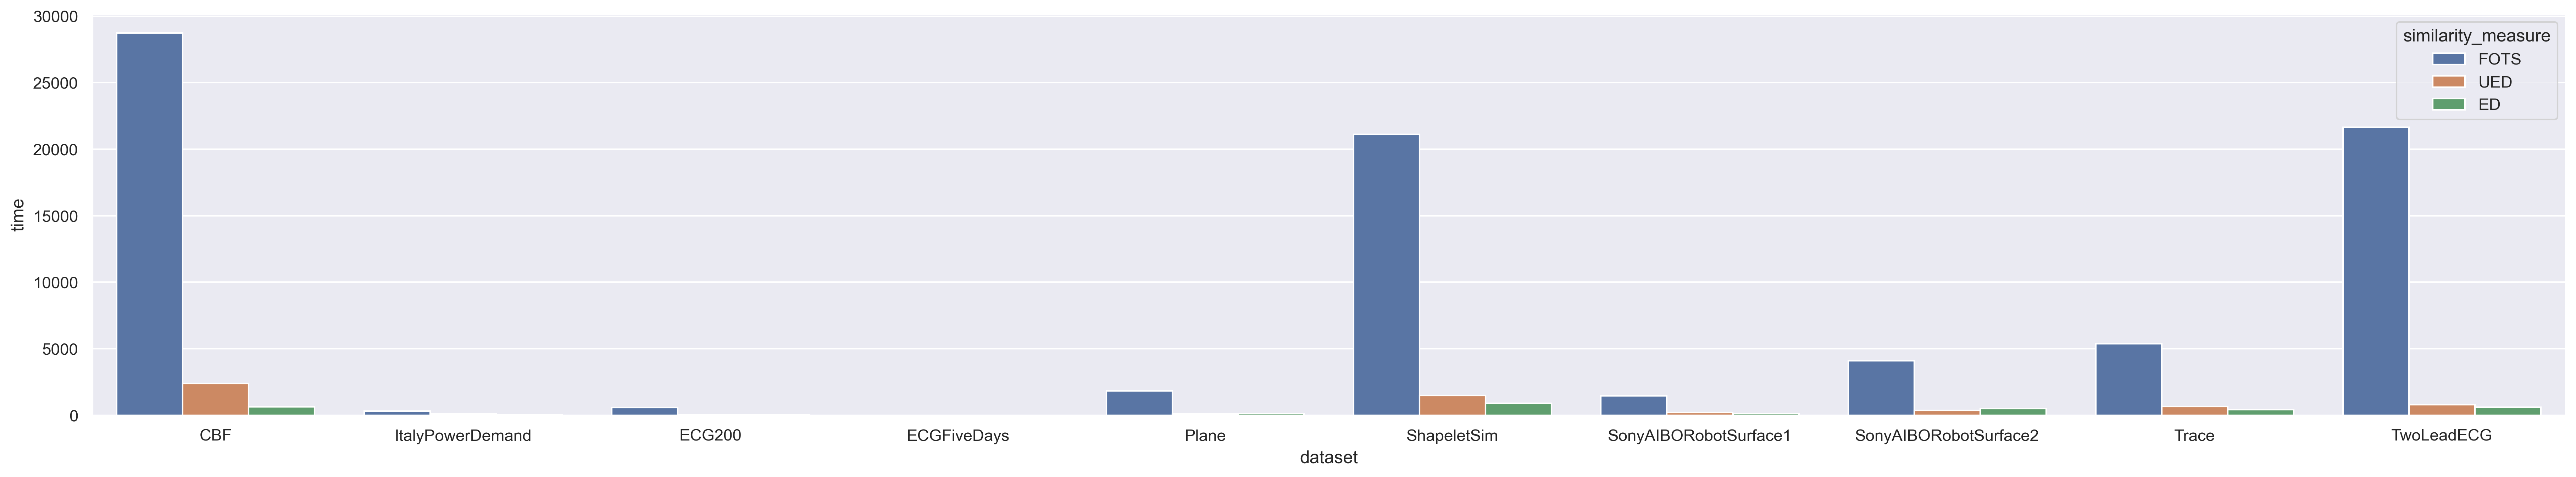

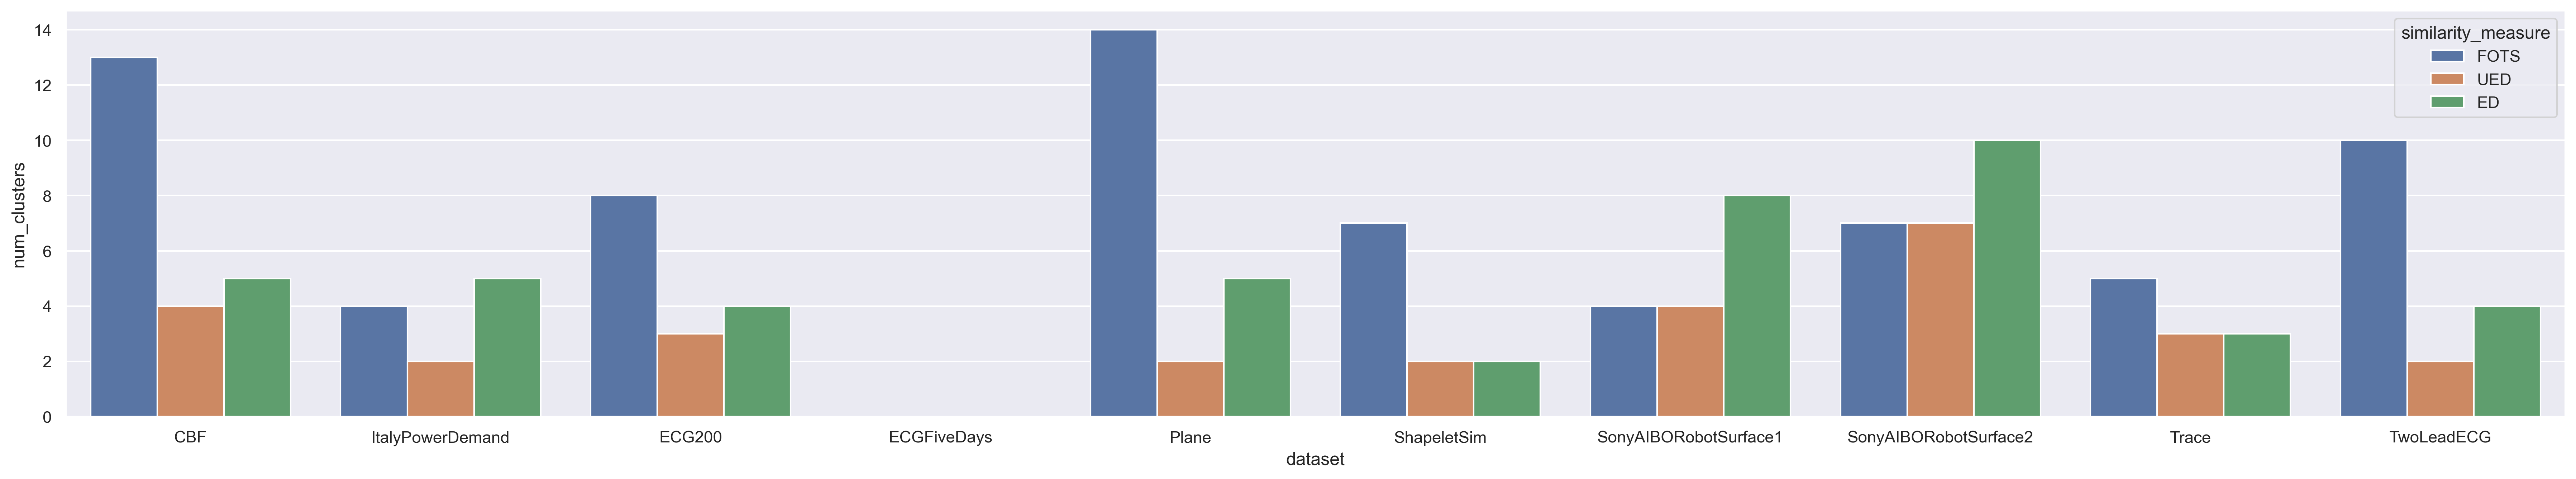

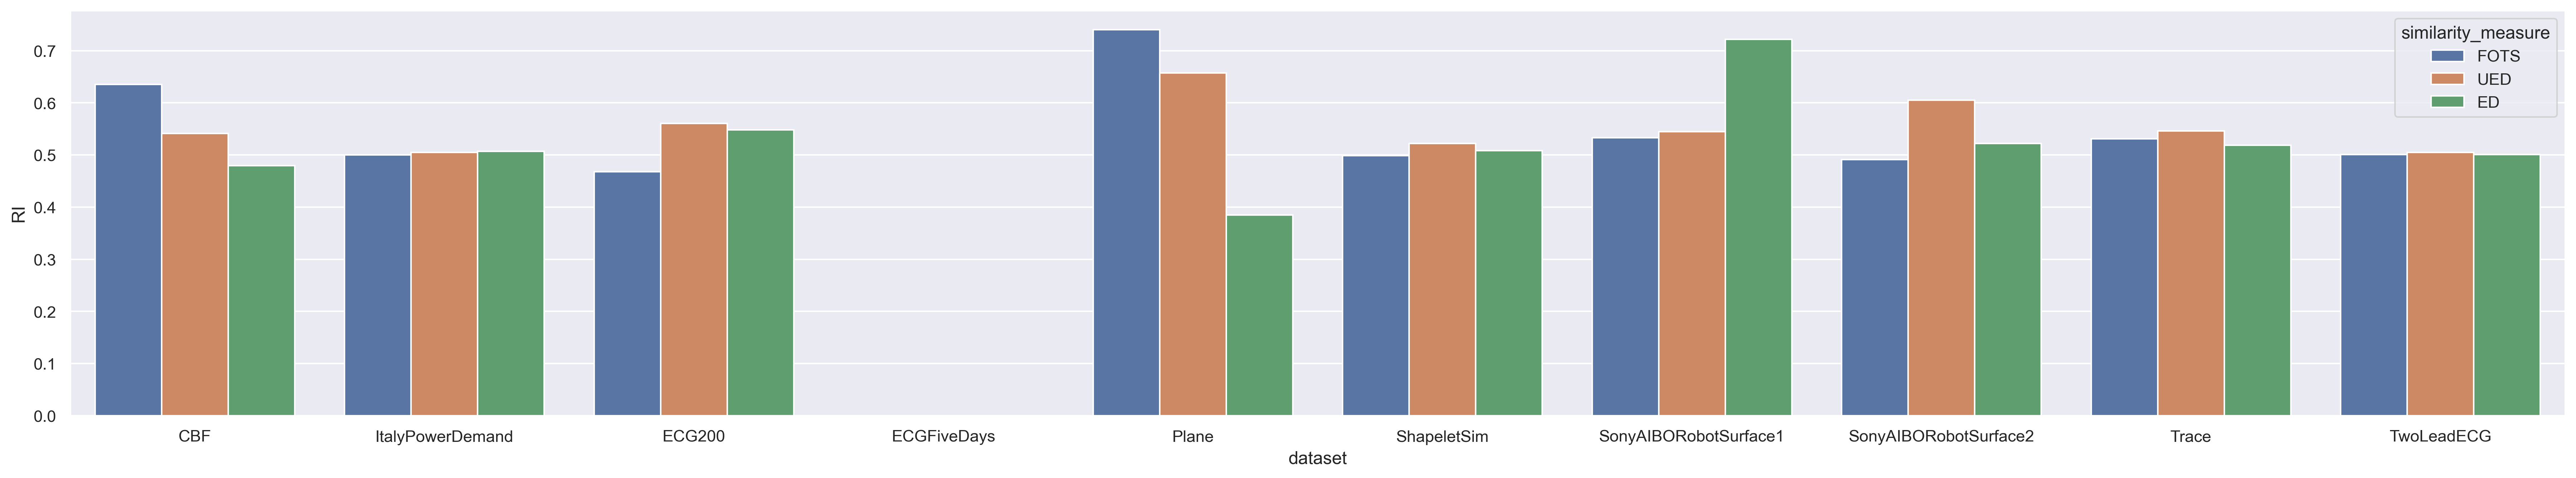

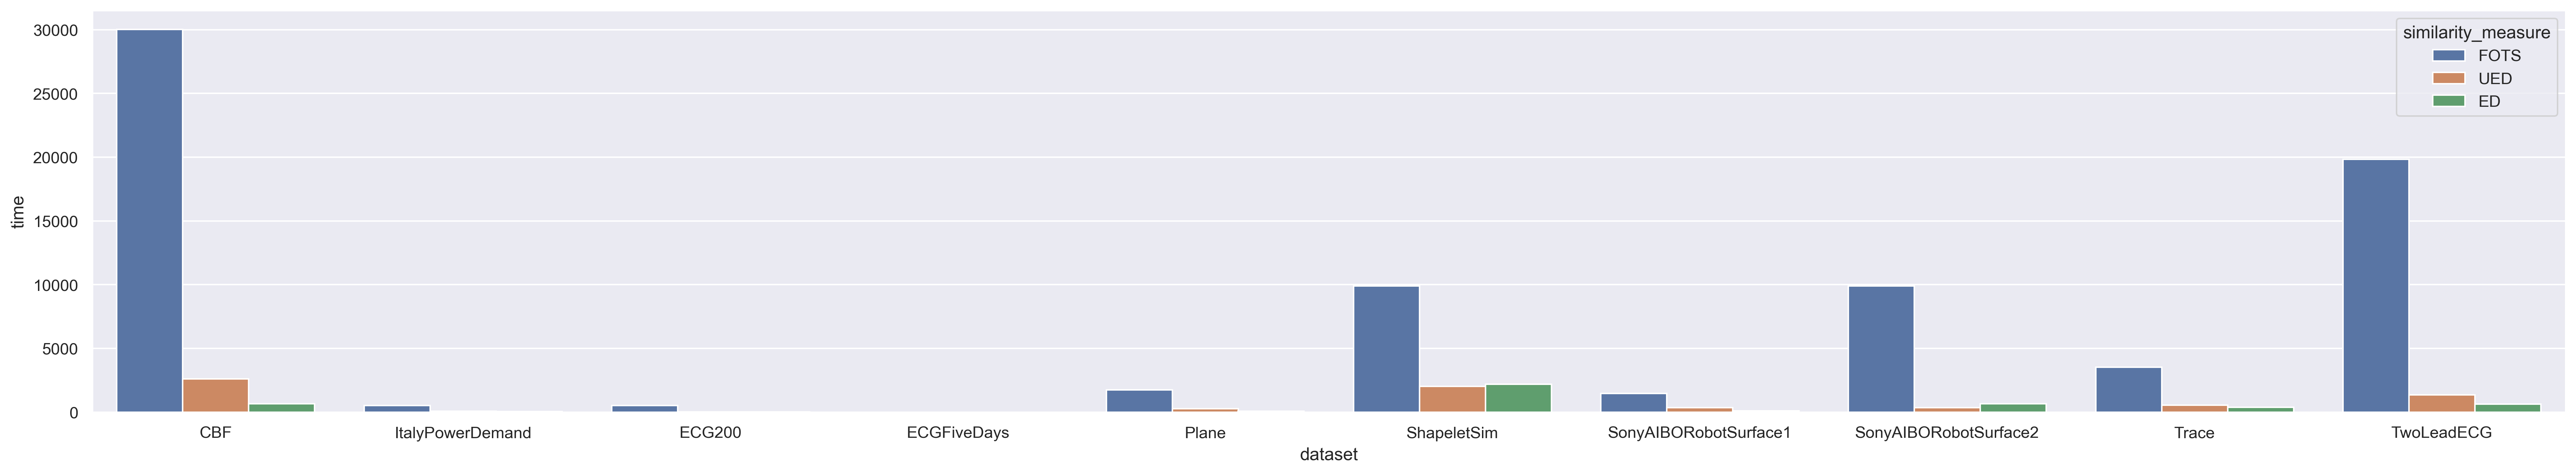

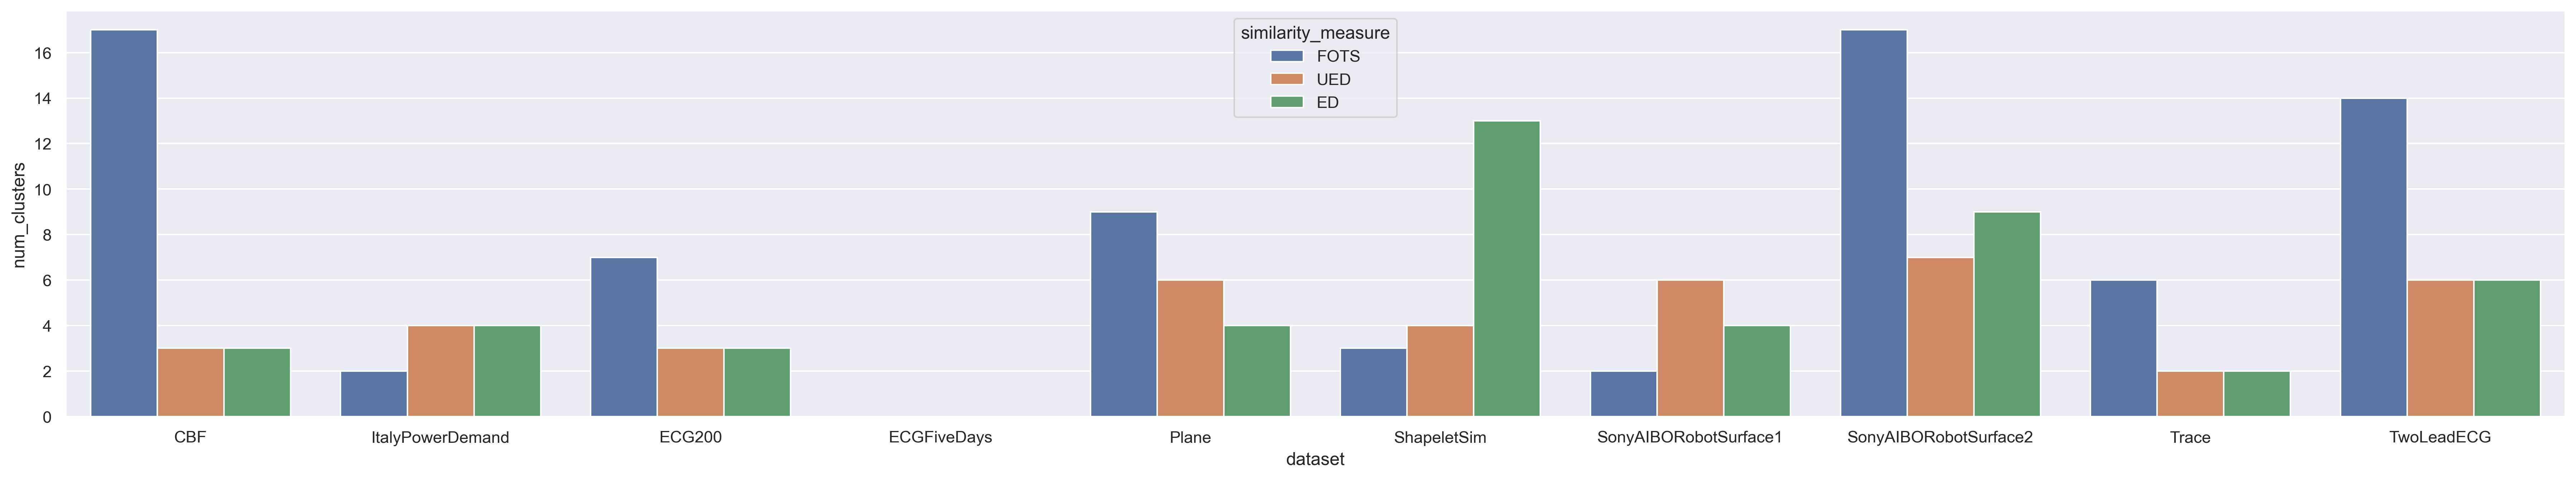

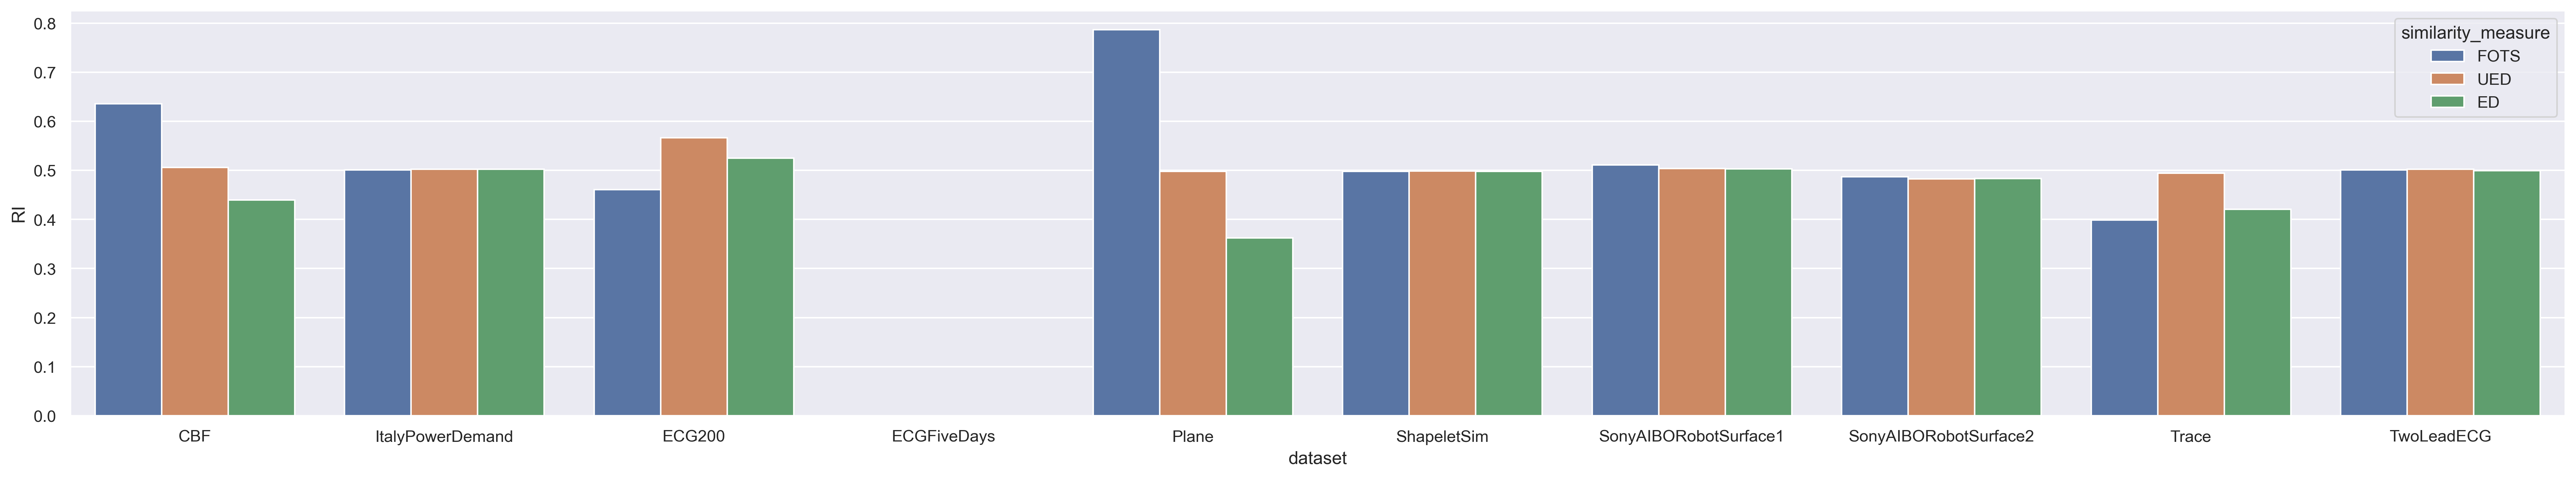

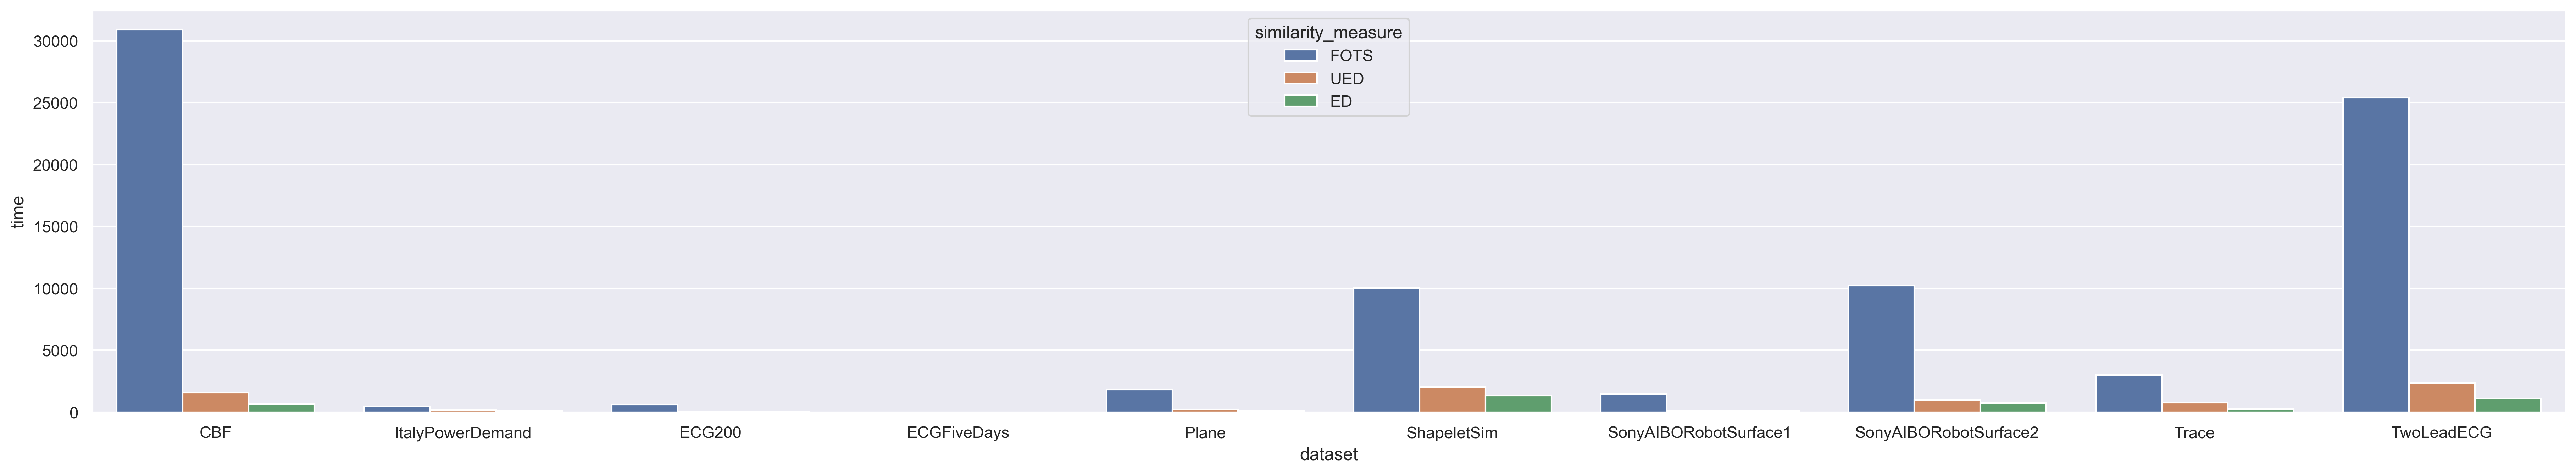

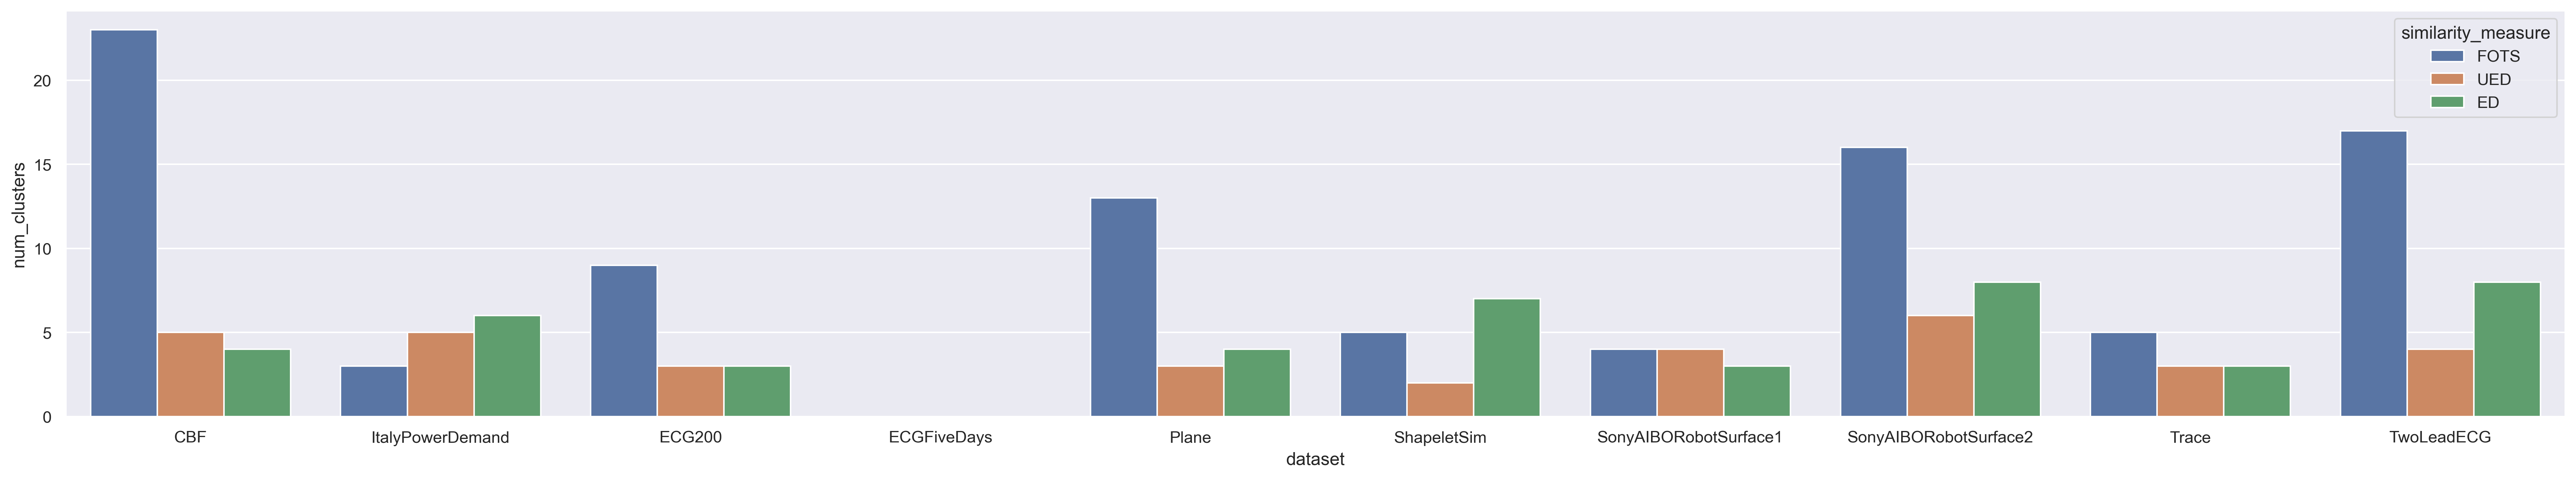

In [9]:
for uncertainty_level in uncertainty_levels:
    for metrics in ['RI', 'time', 'num_clusters']:
        fig_name = 'barplot_' + uncertainty_level + '_' + metrics + '.png'
    
        df_temp = df_results.reset_index(['dataset', 'uncertainty_level', 'similarity_measure'])
        df_temp = df_temp[df_temp.uncertainty_level == uncertainty_level]

        sns.set()
        plt.figure(figsize=(30, 5))
        sns.barplot(data=df_temp, x='dataset', y=metrics, hue='similarity_measure')
        plt.savefig(fig_name)